In [18]:
import pandas as pd

# Load your data files
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')

# Remove rows with merge conflict markers
pollen_df = pollen_df[~pollen_df['Farm'].str.contains('>>>>>>>', na=False)]
visit_df = visit_df[~visit_df['Farm'].str.contains('>>>>>>>', na=False)]

# Check column names first
print("Pollen DataFrame columns:", pollen_df.columns.tolist())
print("Visit DataFrame columns:", visit_df.columns.tolist())

# Merge the DataFrames (adjust column names as needed)
merged_df = pd.merge(pollen_df, visit_df, on='Species', how='inner')

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Now your groupby code should work (with correct column names)
avg_pollen = merged_df.groupby('Visiting')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Pollen DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Visiting
Arctium minus          1.000000
Lamium purpureum       1.000000
Medicago sativa        1.000000
Vicia sepium           1.000000
Silene dioica          0.886364
                         ...   
Potentilla anserina    0.375000
Stachys sylvatica      0.375000
Stellaria media        0.375000
Trifolium campestre    0.306250
Visiting                    NaN
Name: Load, Length: 99, dtype: float64


In [19]:
def safe_merge_and_analyze():
    """Safely load, merge, and analyze data"""
    
    import pandas as pd
    
    try:
        # Load data
        pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
        visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')
        
        print("✓ Data loaded successfully")
        print(f"Pollen shape: {pollen_df.shape}")
        print(f"Visit shape: {visit_df.shape}")
        
        # Show column names
        print("\nColumn names:")
        print(f"Pollen: {pollen_df.columns.tolist()}")
        print(f"Visit: {visit_df.columns.tolist()}")
        
        # Find common columns for merging
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns for merging: {list(common_cols)}")
        
        if len(common_cols) > 0:
            # Use first common column for merging
            merge_col = list(common_cols)[0]
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            
            print(f"✓ Merged on '{merge_col}'")
            print(f"Merged shape: {merged_df.shape}")
            print(f"Merged columns: {merged_df.columns.tolist()}")
            
            # Look for appropriate columns to analyze
            numeric_cols = merged_df.select_dtypes(include=['number']).columns
            categorical_cols = merged_df.select_dtypes(include=['object']).columns
            
            print(f"\nNumeric columns: {numeric_cols.tolist()}")
            print(f"Categorical columns: {categorical_cols.tolist()}")
            
            return merged_df
        else:
            print("No common columns found for merging")
            return None
            
    except Exception as e:
        print(f"Error: {e}")
        return None

# Use the safe function
merged_df = safe_merge_and_analyze()

# If merge was successful, try the analysis
if merged_df is not None:
    # Replace with actual column names from the output above
    # avg_pollen = merged_df.groupby('actual_species_column')['actual_load_column'].mean().sort_values(ascending=False)
    print("Use the column names shown above to create your analysis")

✓ Data loaded successfully
Pollen shape: (3523, 11)
Visit shape: (2467, 11)

Column names:
Pollen: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Common columns for merging: ['Farm', 'Status', 'Species', 'Type', 'Round', 'Date']
✓ Merged on 'Farm'
Merged shape: (658431, 21)
Merged columns: ['Farm', 'Type_x', 'Round_x', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Type_y', 'Round_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']

Numeric columns: []
Categorical columns: ['Farm', 'Type_x', 'Round_x', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Type_y', 'Round_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Use the column n

In [20]:
# Remove rows with merge conflict markers
merged_df = merged_df[~merged_df['Farm'].str.contains('>>>>>>>', na=False)]

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

1. Bar Chart: Average Pollen Load by Flower Species 

Purpose: Shows which flower species provide the most pollen to visiting bees.


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


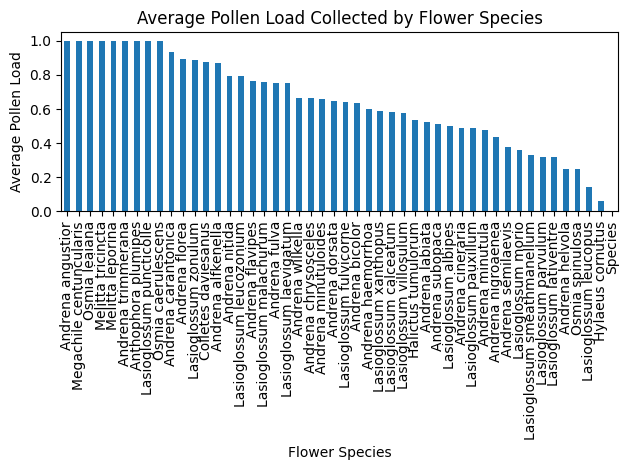

In [23]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Calculate average pollen load per flower species 
avg_pollen = merged_df.groupby('Species_x')['Load'].mean().sort_values(ascending=False)

# Plot
avg_pollen.plot(kind='bar')
plt.title('Average Pollen Load Collected by Flower Species')
plt.xlabel('Flower Species')
plt.ylabel('Average Pollen Load')
plt.tight_layout()
plt.show()

Story: This chart reveals which flowers are more valuable to bees for pollen collection, informing conservation and planting strategies. 

2. Box Plot: Distribution of Pollen Load by Bee Species

Purpose: Compares pollen load variability accross different bee species.

In [ ]:
%pip install seaborn
import seaborn as sns


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


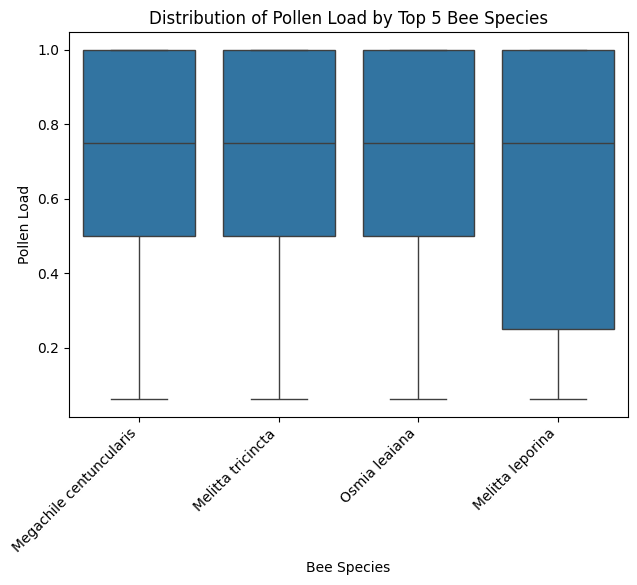

In [30]:
# Get top 5 species by average pollen load
top_5_species = avg_pollen.head(5).index.tolist()
top_5_df = merged_df[merged_df['Species_y'].isin(top_5_species)]

sns.boxplot(x='Species_y', y='Load', data=top_5_df)
plt.title('Distribution of Pollen Load by Top 5 Bee Species') 
plt.xlabel('Bee Species')
plt.ylabel('Pollen Load')
plt.tight_layout() 
plt.xticks(rotation=45, ha='right')
plt.show()

Story: Some bee species consistently collect more pollen, while others show greater variability, suggesting differences in foraging behavior or effectiveness. 

3. Scatter Plot: Visiting Frequency vs. Pollen Load

Purpose: Examines the relationship between how often a bee visits flowers and the amount of pollen it collects.

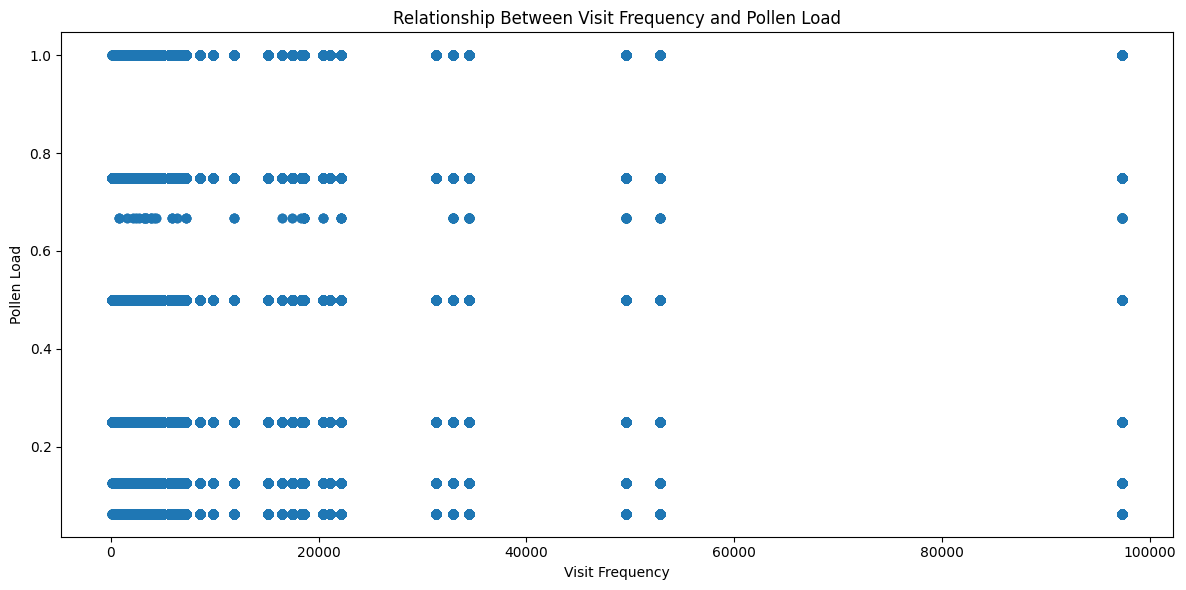

In [36]:
# Remove rows with NaN values in Visiting or Load columns
plot_df = merged_df.dropna(subset=['Visiting', 'Load'])

# Create visit frequency counts
visit_frequency = plot_df.groupby('Species_y').size()
plot_df = plot_df.merge(visit_frequency.rename('visit_frequency'), left_on='Species_y', right_index=True)

plt.figure(figsize=(12, 6))
plt.scatter(plot_df['visit_frequency'], plot_df['Load'], alpha=0.6)
plt.title('Relationship Between Visit Frequency and Pollen Load')
plt.xlabel('Visit Frequency')
plt.ylabel('Pollen Load')
plt.tight_layout()
plt.show()

Story: Identifies whether frequent visits are associated with higher pollen loads, highlighting the efficiency of bee foraging patterns. 

4. Stacked Bar Chart: Number of Visits per Flower Species by Bee Species 

Purpose: Illustrates which bee species visit which flowers most often.

C:\Users\schne\AppData\Local\Temp\ipykernel_20260\654335133.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


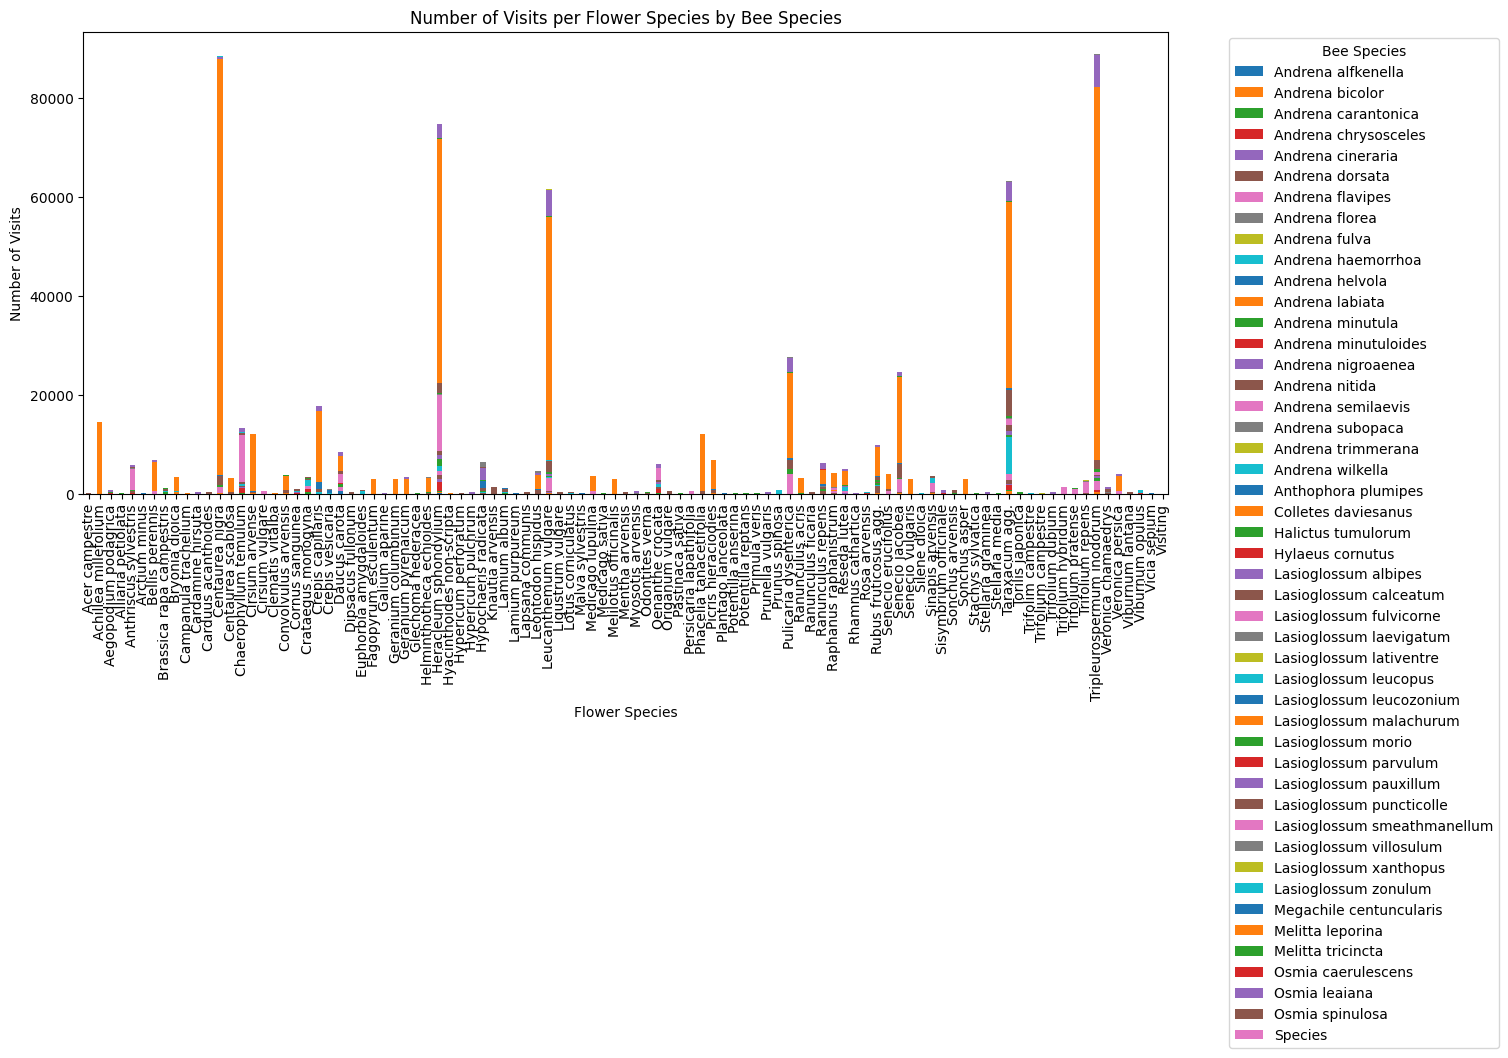

In [ ]:
visits = merged_df.groupby(['Visiting', 'Species']).size().unstack().fillna(0)
visits.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Number of Visits per Flower Species by Bee Species')
plt.xlabel('Flower Species')
plt.ylabel('Number of Visits')
plt.legend(title='Bee Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Story: Highlights bee-flower interaction networks, showing preferences and resource partioning amoung species.

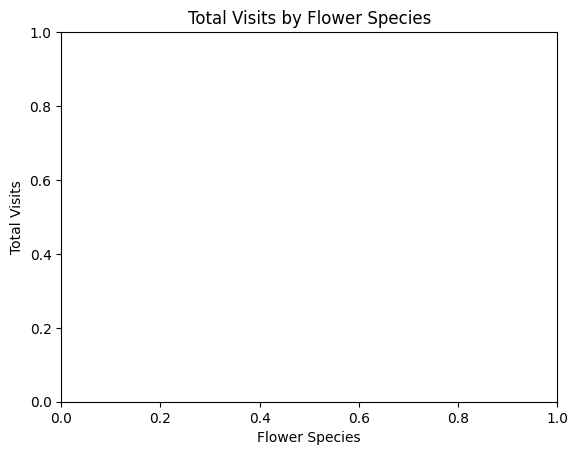

In [ ]:
import matplotlib.pyplot as plt

# Now you can use plt functions
plt.title('Total Visits by Flower Species')
plt.xlabel('Flower Species')
plt.ylabel('Total Visits')
plt.show()

In [ ]:
# Basic plotting
import matplotlib.pyplot as plt

# For more advanced visualizations
import seaborn as sns

# For numerical operations
import numpy as np

# For data manipulation
import pandas as pd

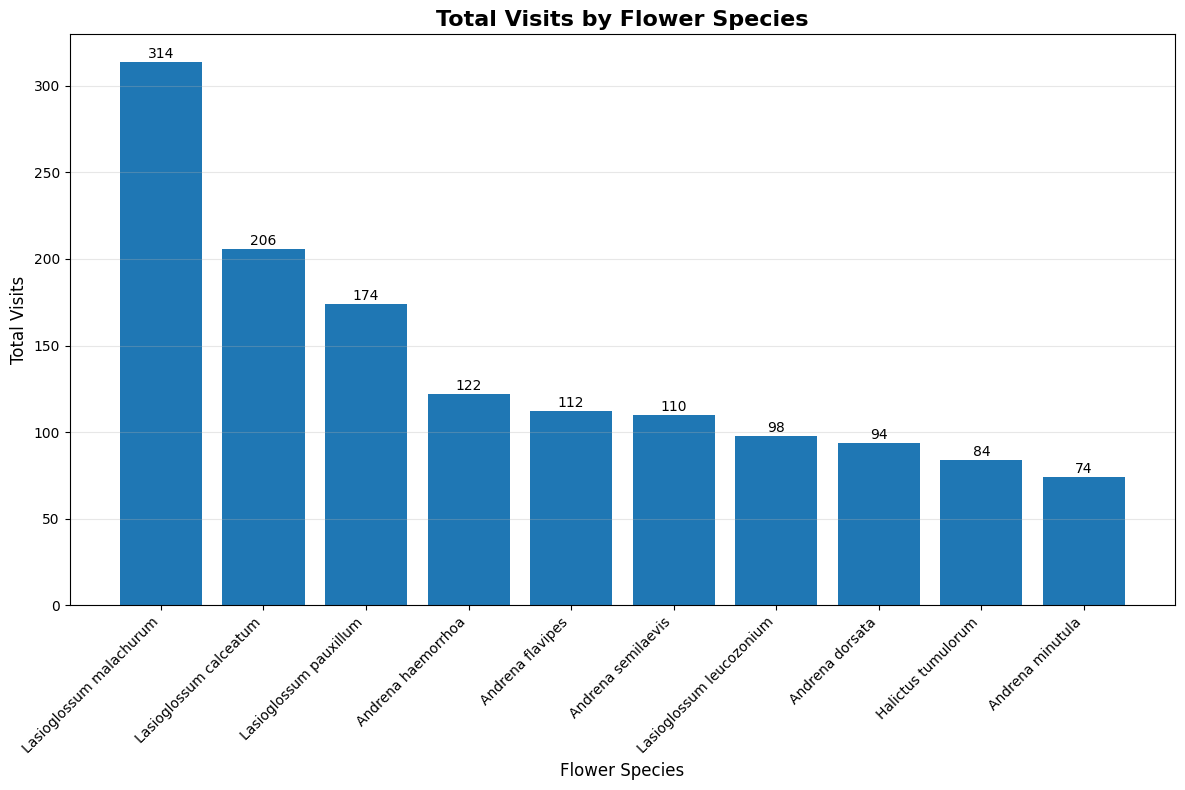

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
try:
    visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')
    
    # Count visits by species
    visits_by_species = visit_df['Species'].value_counts().head(10)  # Top 10 species
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(visits_by_species)), visits_by_species.values)
    
    # Customize the plot
    plt.title('Total Visits by Flower Species', fontsize=16, fontweight='bold')
    plt.xlabel('Flower Species', fontsize=12)
    plt.ylabel('Total Visits', fontsize=12)
    
    # Set x-axis labels
    plt.xticks(range(len(visits_by_species)), visits_by_species.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')
    
    # Improve layout
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    
    # Show the plot
    plt.show()
    
except FileNotFoundError:
    print("CSV file not found. Check the file path.")
except Exception as e:
    print(f"Error creating plot: {e}")